## アファイン変換
- アファイン変換とは回転・平行移動などの線形変換

アファイン変換の公式
- 回転やせん断変形など　,平行移動
$$
\begin{pmatrix} x' \\ y' \end{pmatrix}=\begin{pmatrix} a & b \\ c & d \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}+\begin{pmatrix} t_x \\ t_y \end{pmatrix}
$$

- github では下記　↓　参照（gitで正しく表示されない為）

$\begin{pmatrix} x' \\ y' \end{pmatrix}$=$\begin{pmatrix} a & b \\ c & d \end{pmatrix}$*$\begin{pmatrix} x \\ y \end{pmatrix}$+$\begin{pmatrix} t_x \\ t_y \end{pmatrix}$

- 線形変換を纏めた行列
$$
\begin{pmatrix} x' \\ y' \\1 \end{pmatrix}=\begin{pmatrix} a & b & t_x \\ c & d & t_y \\0 & 0 & 1 \end{pmatrix}\begin{pmatrix} x \\ y \\1 \end{pmatrix}
$$

- github では下記　↓　参照（gitで正しく表示されない為）

$\begin{pmatrix} x' \\ y' \\1 \end{pmatrix}$=$\begin{pmatrix} a & b & t_x \\ c & d & t_y \\0 & 0 & 1 \end{pmatrix}$*$\begin{pmatrix} x \\ y \\1 \end{pmatrix}$

- 同次座標 -> 1 = (0 0 1)(1) 

- x, y, 以外の軸(同次座標)を導入する
    - 同次座標を導入することによって、変換行列だけでアファイン変換を記述する事ができる
    
#### Open CV では変換行列を定義してアファイン変換をしていく事になる


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 画像の読み込み -> 画像のsize取得 -> 移動距離の定義
img = cv2.imread("data/src/grapes.jpg")
h, w = img.shape[:2]
dx, dy = 30, 30

In [4]:
# 変換行列の定義 30pxづつ右斜め下にずらす
afn_mat = np.float32([[1,0,dx],[0,1,dy]])
img_afn = cv2.warpAffine(img, afn_mat, (w, h))

In [5]:
cv2.imshow("trans", img_afn)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

([], [])

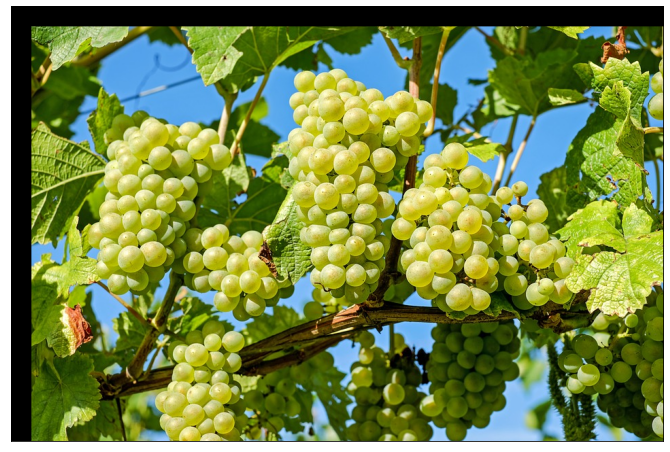

In [6]:
imgRGB = img_afn[:, :, [2, 1, 0]]
plt.figure(figsize=(12, 8))
plt.imshow(imgRGB)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

In [7]:
# 回転変換: getRotationMatrix2D 関数を使用することで簡単に回転を扱うことができる
rot_mat = cv2.getRotationMatrix2D((w/2, h/2), 40, 1)  # 回転させる場所(座標) : 回転させる角度 : 画像の拡大縮小(scale)
img_afn2 = cv2.warpAffine(img, rot_mat, (w, h))       # warpAffineを使用して変換行列を適用する : img(変換元) : 変換する matrix : 画像のsize（解像度） 

In [8]:
cv2.imshow("rotation", img_afn2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

([], [])

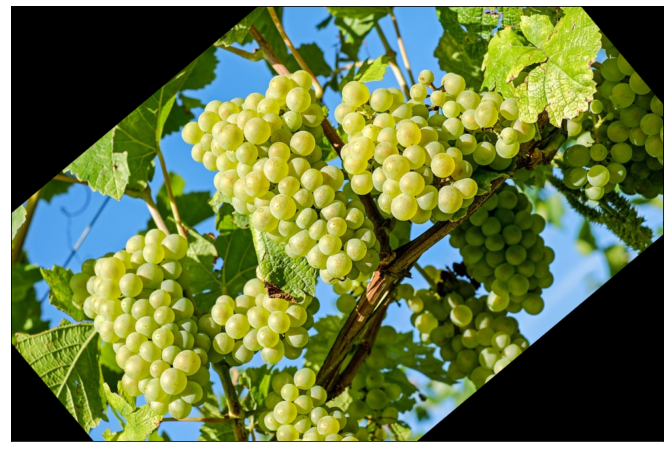

In [9]:
imgRGB = img_afn2[:, :, [2, 1, 0]]
plt.figure(figsize=(12, 8))
plt.imshow(imgRGB)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

## 透視変換
- 透視変換を行うことで、奥行きある画像を描画(変換)する事ができる

In [10]:
import cv2
import numpy as np

In [11]:
img = cv2.imread("data/src/drive.jpg")
h, w = img.shape[:2]
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

([], [])

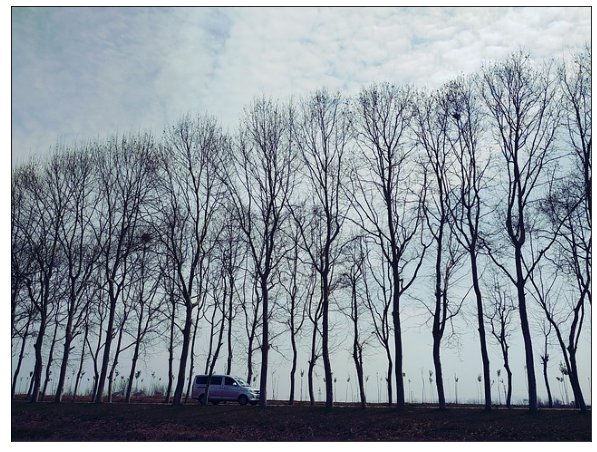

In [12]:
imgRGB = img[:, :, [2, 1, 0]]
plt.figure(figsize=(12, 8))
plt.imshow(imgRGB)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

透視変換する場合には、左上の点、右上の点に対応させるように分布させる(交互に対応させる)

そうする事によって奥行き方向に分布したような画像になる

In [13]:
# 点の対応関係を作成する -> 下記の引数で指定する元の点は、対応関係をうまく調整しないと画像がおかしくなるので、あらかじめ試行錯誤した点の対応関係を使っている
per1 = np.float32([[100, 500], [300, 500], [300, 100], [100, 100]])
per2 = np.float32([[100, 500], [300, 500], [280, 200], [150, 200]])  # こちらの per2 は台形に点を対応させる。対応後の点の場所

psp_mat = cv2.getPerspectiveTransform(per1, per2) # 変換の行列を作成させる
img_psp = cv2.warpPerspective(img, psp_mat, (w, h))       # 作成した matrix を渡す -> 透視変換を行う事ができる

In [14]:
cv2.imshow("psp", img_psp)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

([], [])

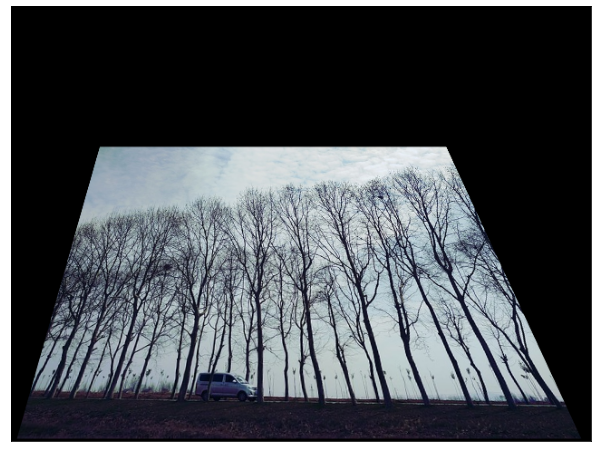

In [15]:
imgRGB = img_psp[:, :, [2, 1, 0]]
plt.figure(figsize=(12, 8))
plt.imshow(imgRGB)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

## 畳み込みの基礎

In [16]:
import cv2
import numpy as pn

kernel = np.ones((3,3)) / 9.0  # 3 * 3 の 1/9 のフィルターを用意する
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [46]:
img = cv2.imread("data/src/Lena.jpg", 0)

# 畳み込んでいく
img_ke1 = cv2.filter2D(img, -1, kernel)  # ３つの引数を与える : 入力画像 : bit深度（負の値を与えておくと元の画像と同じものを返してくれる） : kernel

cv2.imshow("img", img_ke1)  # 少しぼやける
cv2.imshow("src", img)      # はっきり写る
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

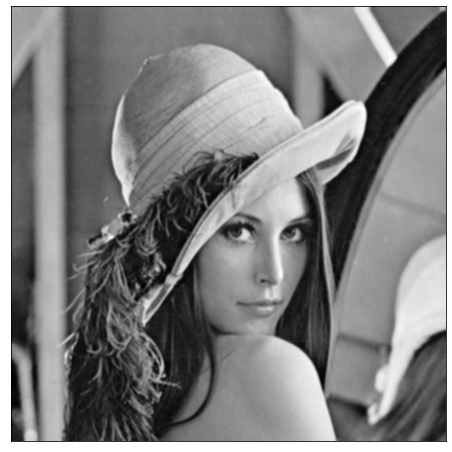

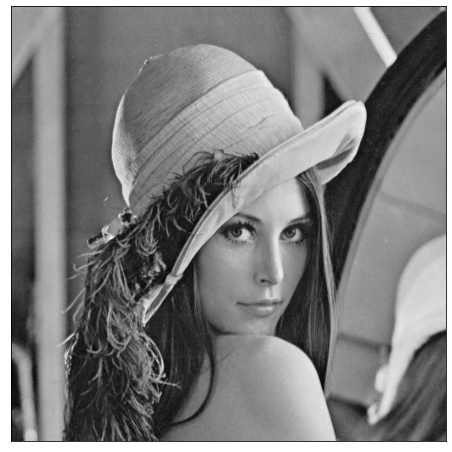

In [47]:
images = [img_ke1, img]
for imgs in images:
    plt.figure(figsize=(12, 8))
    plt.imshow(imgs, cmap=plt.cm.gray)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    plt.show()

- <u>畳み込み　=　img_ke1</u>
    - 畳み込みをするとフィルターがかかるので少しボケている感じになる


上記のようにフィルターを作成して、平滑化や微分ができる…

しかし、毎回フィルターを作成するのは手間なので<u>実際にはそれぞれの用途に合ったフィルターを使用する事が多い</u>

## sobel フィルター

In [48]:
kernel2 = np.zeros((3, 3))
kernel2[0, 0] = 1
kernel2[1, 0] = 2
kernel2[2, 0] = 1
kernel2[0, 2] = -1
kernel2[1, 2] = -2
kernel2[2, 2] = -1

In [49]:
kernel2

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]])

In [50]:
 # : 入力画像 : bit深度（負の値を与えておくと元の画像と同じものを返してくれる）
img_ke2 = cv2.filter2D(img, -1, kernel2)

In [53]:
cv2.imshow('img', img_ke2)
cv2.imshow('src', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

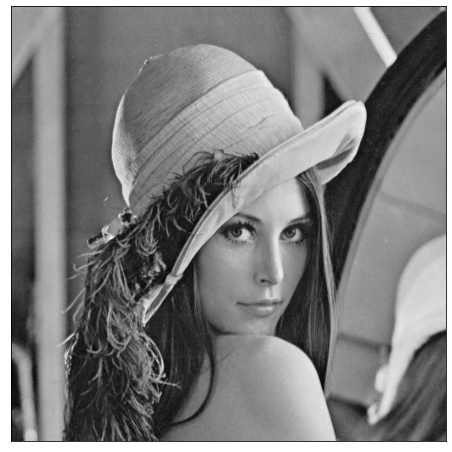

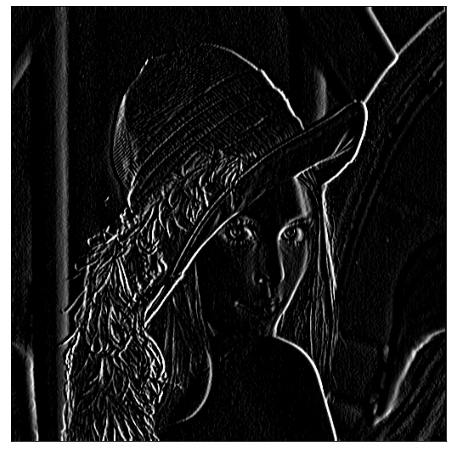

In [55]:
images = [img, img_ke2]
for imgs in images:
    plt.figure(figsize=(12, 8))
    plt.imshow(imgs, cmap=plt.cm.gray)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])

#### 画像が微分されている事がわかる
- エッジを検出している
    - **横方向の微分なので、横にエッジが際立っている**

## 画像の平滑化
- <u>平滑化フィルターはいくつかの種類がある</u>

In [3]:
img = cv2.imread('data/src/buildings.jpg')

### Blur処理（ブラー）
- 平滑化することによりエッジがなだらかになって**ぼやけているイメージ**が強い
- 画像のぼかしの処理

In [8]:
# 画像の平滑化（blur処理）　: 引数を渡す事によって、filterを作らずに処理できる
img_blur = cv2.blur(img, (3, 3))

In [10]:
cv2.imshow('img', img_blur)
cv2.imshow('src', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

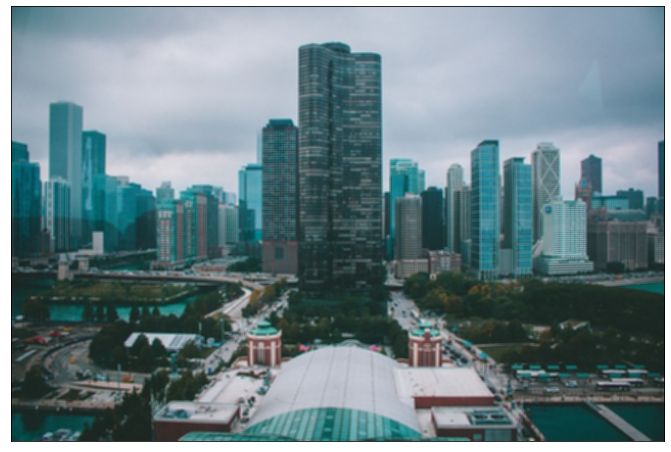

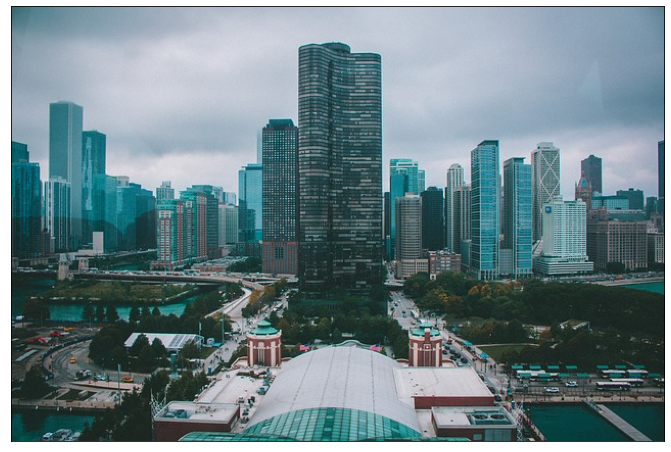

In [11]:
images = [img_blur, img]
for imgs in images:
    imgRGB = imgs[:, :, [2, 1, 0]]  # BGR -> RGB へ
    plt.figure(figsize=(12, 8))
    plt.imshow(imgRGB)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])

## Gaussian Blur (ガウシャンブラー)
- ボカシの調整が引数でできる

In [4]:
# 画像 :　引数は奇数でないとerrorが出る :　シグマに相当する/ここの値が大きほどぼける
img_ga = cv2.GaussianBlur(img, (9, 9), 2)

In [5]:
cv2.imshow('img', img_ga)
cv2.imshow('src', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

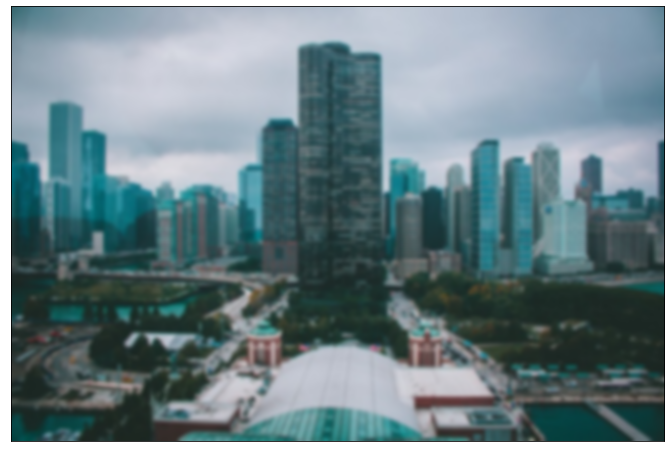

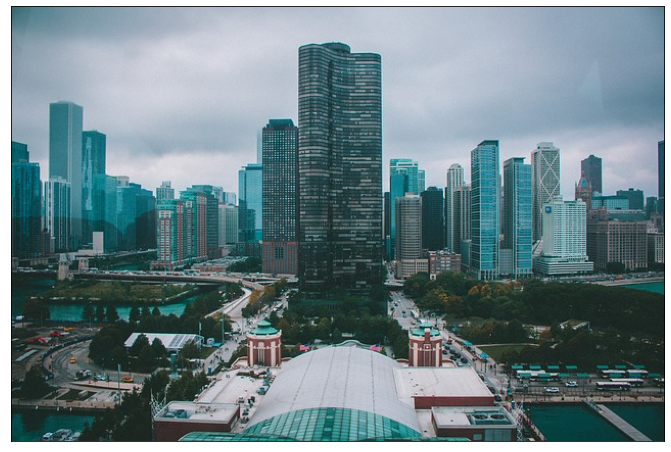

In [6]:
images = [img_ga, img]
for imgs in images:
    imgRGB = imgs[:, :, [2, 1, 0]]  # BGR -> RGB へ
    plt.figure(figsize=(12, 8))
    plt.imshow(imgRGB)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])

## median Blur (ミディアンブラー)
- 5 x 5　の　filter の中での中央値に値するもので塗りつぶす
    - **近しい color のまとまりを作り**エッジを消していくイメージ

In [7]:
img_me = cv2.medianBlur(img, 5)

In [8]:
cv2.imshow('img', img_me)
cv2.imshow('src', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

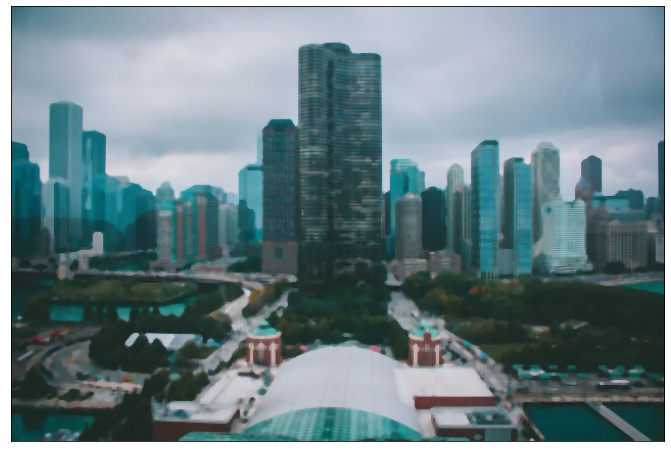

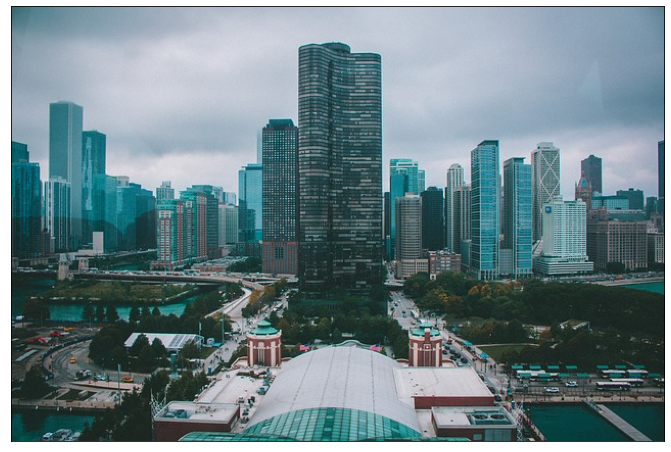

In [9]:
images = [img_me, img]
for imgs in images:
    imgRGB = imgs[:, :, [2, 1, 0]]  # BGR -> RGB へ
    plt.figure(figsize=(12, 8))
    plt.imshow(imgRGB)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])

## bilateralFilter (バイラテラルフィルター)
- <u>輝度変化の激しい場所(エッジがある場所)は残しておいて、なだらかな場所だけ平滑化を行う</u>
    - **medianBlur を優しくしたfilter**のイメージ
    - *エッジを保存しながら、平滑化を行いたい場合に使用する*

In [10]:
# 画像 : 窓の大きさ : エッジを保存する為のシグマ : ボカシ調整
img_bi = cv2.bilateralFilter(img, 20, 30, 30)

In [11]:
cv2.imshow('img', img_bi)
cv2.imshow('src', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

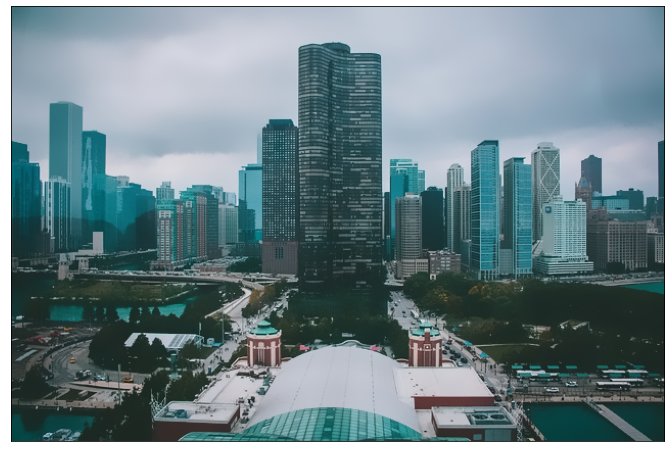

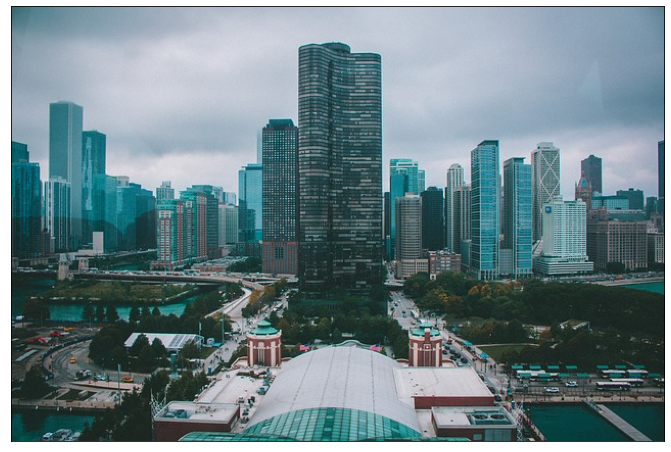

In [12]:
images = [img_bi, img]
for imgs in images:
    imgRGB = imgs[:, :, [2, 1, 0]]  # BGR -> RGB へ
    plt.figure(figsize=(12, 8))
    plt.imshow(imgRGB)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])

## 画像の微分
- 微分とは小さな区間の関数の変化
    - 曲線の傾き = X (微分係数)の求め方
$$
X = \frac{f(x+dx)-f(x)}{dx}
$$

- x 〜 x+dx における y の変化量 f(x+dx)

傾き = $\frac{y}{x}$ (yの変化量/xの変化量)


#### <u>画像を微分するとエッジが検出できる</u>
- 画像の微分も上記の式と同じように考える事ができる
    - **画像処理での微分**
        - 黒　=　画素値(0)
        - 白　=　画素値(255)
        - *傾き　＝　隣の画素値(255　or　0)　-　自分の画素値(0　or　255)*
        - 傾き　= 255　or　-255 ※ *エッジがあった場合だけ傾きが出る*


- 画素値の場合は隣との距離 px は全て同じ距離 **(定数)** になる
    - <u>*微分すると傾きの部分だけがエッジが残る*</u>